In [ ]:
conda install -c anaconda scipy

In [124]:
#KAPPA Y R0 EXCITON B
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
import scipy.linalg as la
mu = 0.28
c = 100
a0 = (5.291772 * 10 ** -11)
r0 = (28.5)
k = 4.2
zm = 26
N = 33
h = np.zeros((N,N))
s = zm / (N + 1)
G = mu * np.pi * (r0 * 10 ** -10) / (a0 * k ** 2) 
d1 = np.zeros(N)
for i in range(N):
    for j in range(N):
        if i == j:
            def U(i): return (sp.struve(0,i * s) - sp.yn(0,i * s))
            h[i,j] = -G * U(i) + 2 / (s ** 2)
        if i == j + 1:
            h[i,j] = -1 / (s ** 2)
        if i == j - 1:
            h[i,j] = -1 / (s ** 2)
h[0,0] = U(0.5*s)
e = la.eig(h)
e = sorted((k**2/(r0**2))*e[0])
eb = np.multiply(c,[e[0],e[1],e[2],e[3]])
# f estimaciones a (En-Eg)/Ry*W despejando r0 y kappa de W
f = np.multiply(c,(-0.0198,-0.00772,-0.002573,-0.000367))
q = np.subtract(eb,f)
Q = np.abs(q)
Err = np.sum(Q)*0.25

(array([2.32760345]), array([[0.0001571]]))


Text(0, 0.5, 'Energía [eV]')

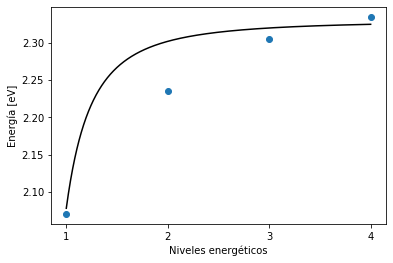

In [163]:
#AJUSTE A ENERGIAS
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
E = [2.07,2.235,2.305, 2.335]
n = [1,2,3,4]
plt.plot(n,E,'o')
E2 = [2.305, 2.335]
n2= [3,4]

import numpy as np
mu = 0.28 * (9.10 * 10 **-28)
e =(4.80 * 10 ** -10)
h = (1.05 * 10 ** -27)
k = 4.4
C = (6.24 * 10 ** 11) * ((mu * e ** 4) / (2 * np.pi * (h **2) * k **2))

from scipy import optimize
def test_func(n,Eg):

    return Eg - C * (n- 0.5)**-2
params = optimize.curve_fit(test_func, n2, E2,p0=[0.2])
def excitonA(n): return 2.33- C * (n - 0.5)**-2
print(params)
n3 = np.linspace(1,4,1000)
plt.plot(n3,excitonA(n3),'k')
x= np.linspace(1,4,4)
plt.xticks(x)
plt.xlabel('Niveles energéticos')
plt.ylabel('Energía [eV]')

In [113]:
#ESTIMACION Z MAX
import numpy as np
from scipy import special as sp
import matplotlib.pyplot as plt
def P(x): return 2.575897578*(sp.struve(0,x) - sp.yn(0,x))
x = np.linspace(0,35,100000)
G = P(x)
print(P(1))
peques = G[G < 0.1*0.65]
a = np.size(peques)
s = 35 / 100000
t = (100000 - a) * s
print(t)

1.2374603279625398
25.1895


0.08663661889989674
[28.80503145]


(20, 40)

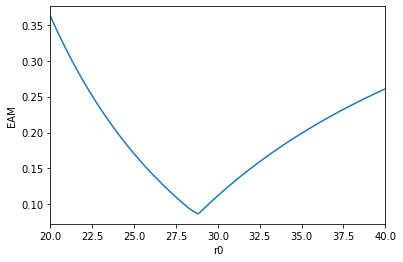

In [81]:
#OPTIMIZACION R0
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
import scipy.linalg as la
mu = 0.28
c = 100
a0 = (5.291772 * 10 ** -11)
zm = 26
N = 33
h = np.zeros((N,N))
s = zm / (N + 1)
d1 = np.zeros(N)
y = np.zeros(500)
for m in range(160,320):
    def G(k): return mu * np.pi * (r0 * 10 ** -10) / (a0 * k ** 2) 
    for i in range(N):
        for j in range(N):
            if i == j:
                def U(i): return (sp.struve(0,i * s) - sp.yn(0,i * s))
                h[i,j] = -G(m/8) * U(i) + 2 / (s ** 2)
            if i == j + 1:
                h[i,j] = -1 / (s ** 2)
            if i == j - 1:
                h[i,j] = -1 / (s ** 2)
    h[0,0] = U(0.5*s)
    e = la.eig(h)
    e = sorted((k**2/((m/8)**2))*e[0])
    eb = np.multiply(c,[e[0],e[1],e[2],e[3]])
    # f estimaciones a (En-Eg)/Ry*W despejando r0 y kappa de W
    f = np.multiply(c,(-0.0198,-0.00772,-0.002573,-0.000367))
    q = np.subtract(eb,f)
    Q = np.abs(q)
    Err = np.sum(Q)*0.25
    y[m] = Err
yb = y[y != 0]
x = np.linspace(20,40,160)
plt.plot(x,yb)
minimo = min(yb)
print(minimo)
p = np.where(yb == minimo)
rmin = x[p]
print(rmin)
plt.xlabel('r0')
plt.ylabel('EAM')
plt.xlim(20,40)

[(-0.839316268208135+0j), (-0.1923506947469116+0j), (-0.0766797216725047+0j), (-0.002033580488615082+0j)]
(array([2.15479921]), array([[0.00049262]]))


Text(0, 0.5, 'Energía [eV]')

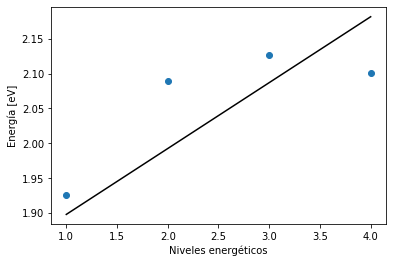

In [123]:
#ANCHO BANDA EXCITON A
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
import scipy.linalg as la
mu = 0.25
c = 100
a0 = (5.291772 * 10 ** -11)
r0 = (28.8)
k = 4.2
zm = 26
N = 33
h = np.zeros((N,N))
s = zm / (N + 1)
G = mu * np.pi * (r0 * 10 ** -10) / (a0 * k ** 2) 
d1 = np.zeros(N)
for i in range(N):
    for j in range(N):
        if i == j:
            def U(i): return (sp.struve(0,i * s) - sp.yn(0,i * s))
            h[i,j] = -G * U(i) + 2 / (s ** 2)
        if i == j + 1:
            h[i,j] = -1 / (s ** 2)
        if i == j - 1:
            h[i,j] = -1 / (s ** 2)
h[0,0] = U(0.5*s)
e = la.eig(h)
e = sorted(e[0])
eb = ([e[0],e[1],e[2],e[3]])
print(eb)
E = [1.926,2.089,2.127,2.101]

from scipy import optimize
def test_func(ep,Eg):
    return Eg + 0.3388 *ep 
params = optimize.curve_fit(test_func, eb, E,p0=[2.3])
print(params)
def energia(t): return 2.18226438 + 0.3388 * t
n = [1,2,3,4]
plt.plot(n,E,'o')
t = np.linspace(-0.839,-0.00203,1000)
E2 = energia(t)
x = np.linspace(1,4,1000)
plt.plot(x,E2,'k')
plt.xlabel('Niveles energéticos')
plt.ylabel('Energía [eV]')

